In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

import pprint #prettyprint
import scipy
import scipy.linalg 



time to run Thomas Algorithm code =  0.0010640621185302734




time to run simplified Thomas Algorithm code =  4.792213439941406e-05




time to run LU code = 0.023262977600097656


biggest verror : 1.1796977821811268
biggest triverror : 1.1796977821811268
biggest uerror : 1.1796977821811268





time to run Thomas Algorithm code =  0.0011980533599853516




time to run simplified Thomas Algorithm code =  0.0003108978271484375




time to run LU code = 0.016835927963256836


biggest verror : 3.088036831559304
biggest triverror : 3.088036831559304
biggest uerror : 3.088036831559304





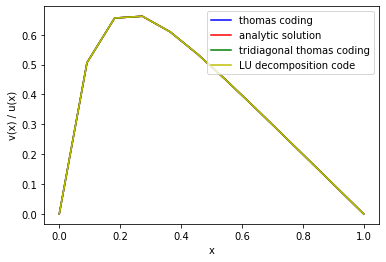

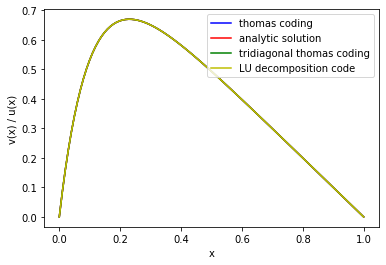

In [2]:




def supercode(n):




    #Initial definitions:
    h = 1 / (n + 1) #h: stepsize between entrances of x-array
    wholexarray = np.linspace(0, 1, n+2)
    shortxarray = wholexarray[1:-1]

    def dfunction(x): #f(x_i) function, here called d
        d = h**2 * 100 * np.exp(-10 * x)
        return d
    d = dfunction(shortxarray)



##################################### Start of coding Algorithms ##########################################################################   


##################################### Thomas Algorithm #####################################################



    start = time.time()




    #Define tridiagonal matrix as arrays:
    a = np.full(np.size(shortxarray),-1)
    b = a * (-2)
    c = a



    #Thomas algortihm: Finds solution for v
    #simplified gauß elimination for tridiagonal matrix
    cmærke,dmærke = np.zeros(np.size(shortxarray)),np.zeros(np.size(shortxarray)) 
    v = np.zeros(np.size(shortxarray)) #solutionarray

    for i in range(np.size(shortxarray)): #forward substitution
        if i == 0: 
            cmærke[i] = c[i] / b[i]
            dmærke[i] = d[i] / b[i]
        else: 
            cmærke[i] = c[i] / (b[i] - cmærke[i-1] * a[i])
            dmærke [i] = (d[i] - dmærke[i-1] * a[i]) / (b[i] - cmærke[i - 1] * a[i])

    for i in range(np.size(shortxarray)-1,-1,-1): #backward substitution
        if i == np.size(shortxarray)-1: 
            v[i] = dmærke[i]

        else:
            v[i] = dmærke[i] - cmærke[i] * v[i + 1]



    end = time.time()
    print()
    print()
    print('time to run Thomas Algorithm code = ', end - start)
    print()
    print()





##################################### Thomas Algorithm, simplified #####################################



    start = time.time()



    #Define Matrix entricies as floating numbers:
    onea = onec = -1
    oneb = 2




    #simplified Thomas algortihm: Finds solution for Triv
    Tricmærke,Tridmærke = np.zeros(np.size(shortxarray)),np.zeros(np.size(shortxarray))
    Triv = np.zeros(np.size(shortxarray)) #solutionarray

    for i in range(np.size(shortxarray)): #forward substitution
        if i == 0: 
            Tricmærke[i] = onec / oneb
            Tridmærke[i] = d[i] / oneb
        else: 
            Tricmærke[i] = onec / (oneb - Tricmærke[i-1] * onea)
            Tridmærke [i] = (d[i] - Tridmærke[i-1] * onea) / (oneb - Tricmærke[i - 1] * onea)

    for i in range(np.size(shortxarray)-1,-1,-1): #backward substitution
        if i == np.size(shortxarray)-1: 
            Triv[i] = Tridmærke[i]

        else:
            Triv[i] = Tridmærke[i] - Tricmærke[i] * Triv[i + 1]




    end = time.time()
    print()
    print()
    print('time to run simplified Thomas Algorithm code = ', end - start)
    print()
    print()



##################################### LU decomposition ##########################################################################    




    start = time.time()


    A = np.eye(n,n,k=-1)*-1 + np.eye(n,n)*2 + np.eye(n,n,k=1)*-1
    #LU decomposition
    P, L, U = scipy.linalg.lu(A)




    #Forward substitution: finding y from lower matrix ( L y = b ) 
    #only two matric entrances per row, therefor simplified algorithm
    y = np.zeros(np.size(d))

    for i in range(np.size(d)):

        y[i] = (d[i] - L[i,i-1] * y[i-1]) / L[i,i] #check i-1 


    #Backward substitution: finding x from upper matrix ( U x = y ) (here x called presolutions)
    #only two matric entrances per row, therefor simplified algorithm
    presolutions = np.zeros(np.size(y))
    for i in range(np.size(y)):

        if i == 0:
            presolutions[np.size(y)-1] = y[np.size(y)-1] / U[np.size(y)-1,np.size(y)-1]

        else:
            presolutions[np.size(y)-1-i] = (y[np.size(y)-1-i] + 1 * presolutions[np.size(y)-i]) / U[np.size(y)-1-i,np.size(y)-1-i]   





    end = time.time()
    print()
    print()
    print('time to run LU code =', end - start)
    print()
    print()



##################################### End of Coding Algorithms ########################################################################## 


##################################### Find the analytic solutions ##########################################################################



    def analyticsolutionfunction(x):
        s = 1 - (1 - np.exp(-10)) * x - np.exp(-10 * x)
        return s

    analyticsolutions = analyticsolutionfunction(shortxarray)




##################################### Adding the u(0) = u(1) = 0 terms ##########################################################################


    wholevarray = wholetrivarray = wholeuarray = wholeanalyticsolutions = np.zeros(np.size(shortxarray) + 2)
    for m in range(np.size(shortxarray)):
        wholevarray[m + 1] = v[m]
        wholetrivarray[m + 1] = Triv[m]
        wholeuarray[m+1] = presolutions[m]
        wholeanalyticsolutions[m+1] = analyticsolutions[m]




##################################### relativeerror function ##########################################################################




    errorvarray =  errortrivarray =  erroruarray  =  np.zeros(np.size(shortxarray))

    for i in range(np.size(shortxarray)):
        errorvarray[i] = math.log10(abs((v[i] - analyticsolutions[i]) / analyticsolutions[i]))
        errortrivarray[i] = math.log10(abs((Triv[i] - analyticsolutions[i]) / analyticsolutions[i]))
        erroruarray[i] = math.log10(abs((presolutions[i] - analyticsolutions[i]) / analyticsolutions[i]))


    print('biggest verror :', abs(max(errorvarray, key=abs)))


    print('biggest triverror :', abs(max(errortrivarray, key=abs)))


    print('biggest uerror :', abs(max(erroruarray, key=abs)))







    #plotting solutions
    fig = plt.figure()
    plt.plot(wholexarray, wholevarray,'b')
    plt.plot(wholexarray, wholeanalyticsolutions,'r')
    plt.plot(wholexarray, wholetrivarray, 'g')
    plt.plot(wholexarray, wholeuarray, 'y')
    plt.legend(('thomas coding','analytic solution','tridiagonal thomas coding','LU decomposition code'),loc='upper right')
    plt.xlabel('x')
    plt.ylabel('v(x) / u(x)')
    print()
    print()
    print()


        
##################################### Run the Code ##########################################################################      

       

for x in range(1,3):
    n = 10**x   
    supercode(n)
    
  
    
    
    

